In [16]:
from TCLIService.ttypes import TOperationState
from pyhive import hive


# Hive 서버에 연결합니다.
conn = hive.Connection(host='15.164.220.245', port=10000, database='test_hadoop')

# Hive 쿼리를 실행합니다.
query = "SELECT content FROM test_hadoop10"
cursor = conn.cursor()
cursor.execute(query)

# 쿼리 결과를 가져옵니다.
results = cursor.fetchall()

# 결과를 출력하거나 처리합니다.
#for row in results:
#    print(row)

#result_dicts = [{'content': row[0]} for row in results]
# 연결을 닫습니다.
conn.close()

('국민의힘이 7일 서울 강서구청장 보궐선거에 후보를 내기 위한 당 공천관리위원회(공관위)를 구성했다 당초 자당 소속 선출직 공무원의 귀책 사유로 치르는 선거라는 점에서 무공천’을 고려했으나 이날 당 지도부는 “이번 선거를 치르게 된 데는 민주당의 책임도 있다”고 했다 윤석열 대통령의 광복절 특별사면으로 복권 된 김태우 전 강서구청장의 궐위가 무공천 사유’에 해당하지 않는다는 것이다김태우 전 강서구청장이 28일 오후 서울 강서구의 한 빌딩에서 오는 10월 치러질 강서구청장 보궐선거를 위한 선거사무소 개소식에 참석해 인사하고 있다 뉴스1국민의힘은 이날 오전 부산에서 현장 최고위원회의를 열고 이철규 사무총장을 위원장으로 하는 공관위 구성 안건을 의결했다 위원은 총 5명으로 박성민(전략기획부총장)·배현진(조직부총장)·강민국 의원 김선동 서울시당 위원장 송상헌 홍보본부장이 참여한다강민국 수석대변인은 비공개 최고위 직후 “공당이 보궐선거에 후보를 추천하지 않을 이유는 없고 이번 보궐선거에는 민주당 책임도 있다”고 했다 특히 “김태우 전 구청장이 공익 제보자로서 폭로한 비리·의혹은 문재인 정권이 초래한 조국 사태 등 총체적 불법 행위였다”며 “조국 전 장관이 유죄 선고를 받았는데도 김 전 구청장에 유죄가 나온 건 김명수 대법원의 편향된 재판 결과”라고 했다기존에 지도부가 당헌‧당규에 근거해 검토하던 무공천’ 입장에서 돌아서는 건 물론 김 전 구청장을 공천하는 방안 역시 긍정적으로 검토한다는 의미다 강 수석대변인은 김 전 구청장 전략공천 가능성에 대해 “공관위가 결정할 것”이라고 했다 앞서 더불어민주당은 문재인 정부 마지막 경찰청 차장을 지낸 진교훈 후보를 전략공천했다오는 10월 예정된 강서구청장 보궐선거는 국민의힘 소속인 김 전 구청장이 지난 5월 대법원에서 징역 1년 집행유예 2년을 확정 받고 구청장직을 상실하면서 치러지게 됐다김 전 구청장은 문재인 정부 시절 청와대 특별감찰반원으로 활동하던 당시 조국 전 법무부 장관의 유재수 감찰 무마 의혹’ 등을 폭로하고 공무상 비

In [17]:
import numpy as np
from pecab import PeCab
from konlpy.tag import Mecab
# 워드클라우드 관련
from wordcloud import WordCloud
from PIL import Image
# 자연어처리 관련
import nltk
# 파일 처리 관련
import pandas as pd
import os
import re

In [18]:
# mecab 기준, 명사 & 형용사 & 동사 & 부사
FEATURE_POS = ['NNG', 'NNP', 'NNB', 'NNBC', 'NR',
               'NP', 'VV', 'VA', 'MAG']


def text_cleaning(doc):
    # 한국어를 제외한 글자를 제거하는 패턴.
    #doc = re.sub("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]", "", doc)
    
    # 특수문자를 제거하는 패턴.
    doc = re.sub("[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@\#$%&\\\=\(\'\"]", " ", doc)
    
    # 영문 빼고 모두 제거하는 패턴.
    #doc = doc.replace("\n", " ")
    #doc = re.sub("[^A-Za-z ]", "", doc)
    
    return doc

def define_stopwords(path):
    
    SW = set()
    # 불용어를 추가하는 방법 1.
    # SW.add("있다")
    SW.add("있어요")
    SW.add("대한")
    SW.add("합니다")
    SW.add("하는")
    
    # 불용어를 추가하는 방법 2.
    # stopwords-ko.txt에 직접 추가
    
    with open(path, encoding="utf-8") as f:
        for word in f:
            SW.add(word.strip())
            
    return SW

def text_tokenizing(doc, tokenizer): 
    """
    Input Parameter :
    
    doc - tokenizing 하는 실제 데이터.
    tokenizer - token의 단위.
    """
    #tok = PeCab() # 형태소 분석기 선언.
    tok = Mecab()
    
    if tokenizer == "words":
        return [word for word in doc.split() if word not in SW and len(word) > 1]
    
    elif tokenizer == "nouns":
        return [token for token in tok.nouns(doc)]
        
    elif tokenizer == "morphs":
        return [token for token in tok.morphs(doc)]
     
    elif tokenizer == "predefined":
        
        documents = []
        text_pos = [pair for pair in tok.pos(doc) if pair[0] not in SW and len(pair[0]) > 1]
        words = []

        for word, pos in text_pos:
            if pos in FEATURE_POS:
                words.append(word)

        return words

In [19]:
tokenizer = "predefined" # "words" / "nouns" / "morphs" / "predefined"

In [20]:
# stopwords : 불용어 --> token filtering.
SW = define_stopwords("stopwords-ko.txt")

In [21]:
#document = str(' '.join(results))
document = pd.DataFrame(results, columns=['content'])

documents = document.content
#documents = document.contents
tokenized_documents = documents.apply(text_cleaning)\
                               .apply(func=text_tokenizing, tokenizer=tokenizer)#.apply(lambda x: text_tokenizing(x, tokenizer))
tokenized_documents # 2d list

0      [국민, 서울, 강서구, 청장, 보궐, 선거, 후보, 공천, 관리, 위원회, 관위,...
1      [한덕수, 국무총리, 오후, 서울, 여의도, 국회, 회의장, 경제, 분야, 정부, ...
2      [민주, 정치, 논쟁, 홍보물, 불법, 국민, 심리, 안정, 원희룡, 위반, 검토,...
3      [서울, 뉴스, 임세영, 기자, 덕수, 국무총리, 서울, 여의도, 국회, 국회, 정...
4      [서울, 뉴스, 임세영, 기자, 박범계, 더불, 민주당, 의원, 서울, 여의도, 국...
                             ...                        
192    [기상청, 정례, 브리핑, 주말, 일교차, 최저, 기온, 안팎, 이후, 공기, 유입...
193    [출연, 손정혜, 변호사, 약물, 압구정, 롤스로이스, 재판, 한편, 거짓, 아르바...
194    [기상청, 여름철, 기후, 분석, 서울, 한낮, 기온, 오르, 늦더위, 오후, 시민...
195    [코로나, 영향, 추정, 김원이, 의원, 학교, 정신, 건강, 인력, 인프라, 확충...
196    [학년도, 대학, 수학, 능력, 시험, 모의, 평가, 표준, 점수, 최고점, 국어,...
Name: content, Length: 197, dtype: object

In [22]:
from pprint import pprint

total_tokens = [token for doc in tokenized_documents for token in doc]
print(len(total_tokens))

text = nltk.Text(total_tokens)
print(len(set(text.tokens)))
# top 10 뽑기
text.vocab().most_common(10)

33890
5000


[('서울', 216),
 ('중국', 148),
 ('기자', 132),
 ('평가', 123),
 ('정부', 122),
 ('기술', 122),
 ('기업', 120),
 ('대표', 119),
 ('사업', 117),
 ('상승', 110)]

In [23]:
# 빈도 출력 갯수.
from nltk import FreqDist

topN = 50

x = []
y = []
wordInfo = dict()

for vocab, count in text.vocab().most_common(topN):
    x.append(vocab)
    y.append(count)
    wordInfo[vocab] = count
    
test = {"Counts" : x, "Samples" : y}
print(x[:5])
print(y[:5])

['서울', '중국', '기자', '평가', '정부']
[216, 148, 132, 123, 122]


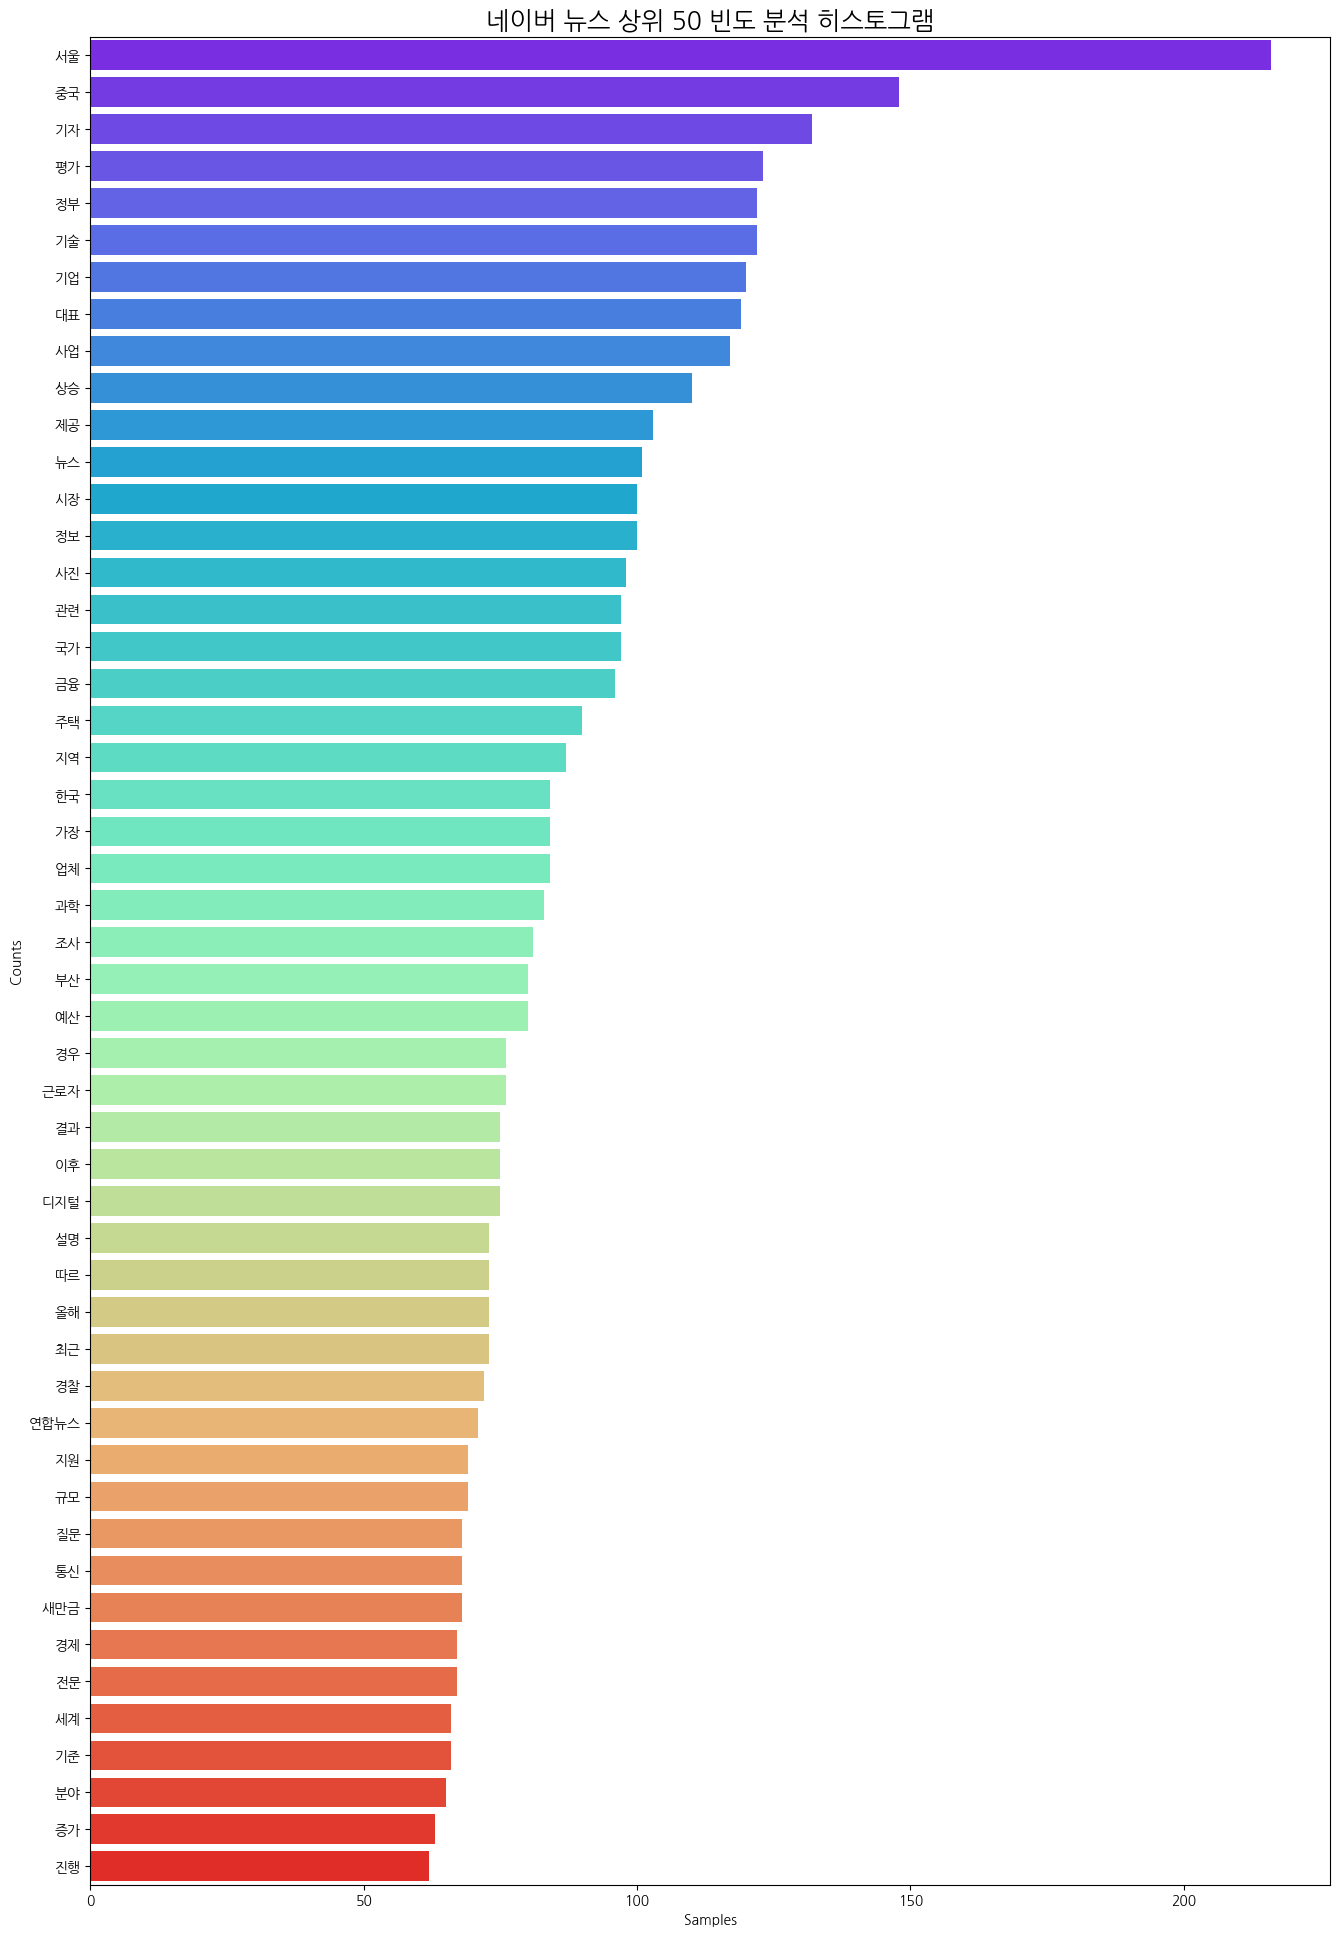

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc
%matplotlib inline

# 글꼴 설정
#path = "c:/Windows/Fonts/malgun.ttf"
# if platform.system() == 'Darwin':
#     rc('font', family='AppleGothic')
# elif platform.system() == 'Windows':
#font_name = font_manager.FontProperties(fname=path).get_name()
#rc('font', family=font_name)

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = font_manager.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)


plt.figure(figsize=(16, 24))
plt.title("네이버 뉴스 상위 %d 빈도 분석 히스토그램" % (topN) , fontsize=18)
plt.xlabel("Samples")
plt.ylabel("Counts")
sns.barplot(x="Samples", y="Counts", data=test, palette="rainbow")
plt.show()

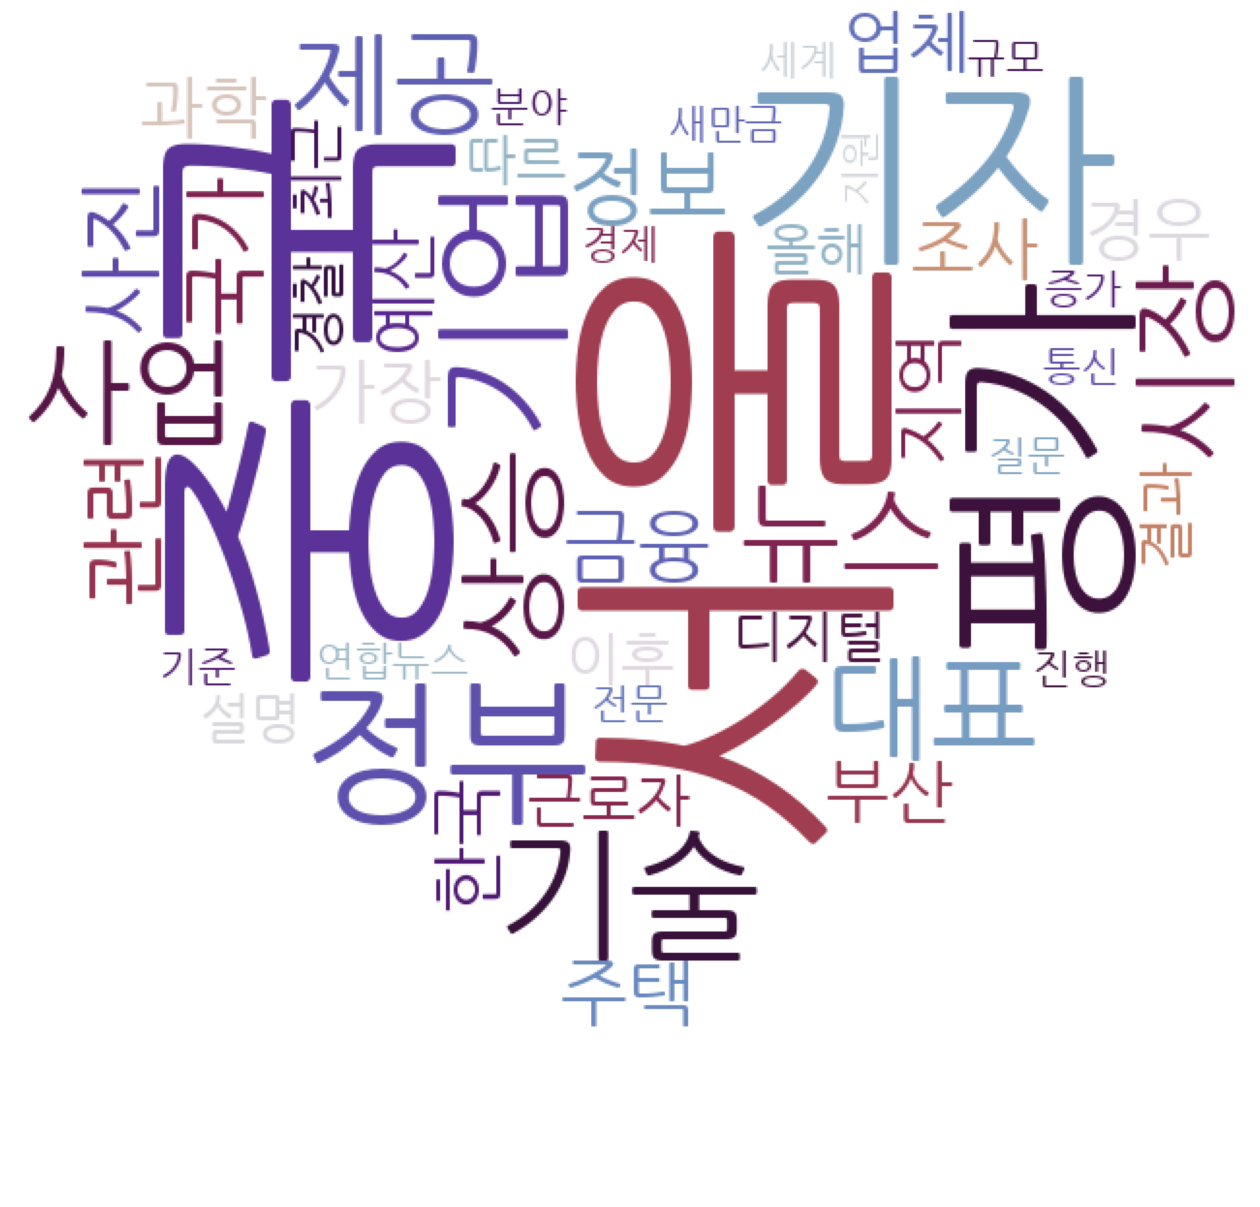

In [25]:
# for windows : font_path='c:/Windows/Fonts/malgun.ttf'
# for macOS : font_path = "/usr/share/fonts/nanumfont/AppleGothic.ttf"

# 워드클라우드 만들 배경 그림 경로. ex) cloud.png
mask = np.array(Image.open("ht.png"))
wordcloud = WordCloud(font_path = path,
                      relative_scaling = 0.2,
                      mask=mask,
                      background_color='white',
                      colormap="twilight"
                      ).generate_from_frequencies(wordInfo)
plt.figure(figsize=(16,16))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("./test2.png")
plt.show()

In [26]:
import slack

client = slack.WebClient(token='xoxp')
response = client.files_upload(
    channels="C0",
    file='test2.png',
    title='test',
    filetype='image/png'
)
assert response["ok"]

/config/.local/lib/python3.10/site-packages/slack/deprecation.py:14: UserWarning: slack package is deprecated. Please use slack_sdk.web/webhook/rtm package instead. For more info, go to https://slack.dev/python-slack-sdk/v3-migration/
  warnings.warn(message)
/config/.local/lib/python3.10/site-packages/slack_sdk/web/internal_utils.py:450: UserWarning: client.files_upload() may cause some issues like timeouts for relatively large files. Our latest recommendation is to use client.files_upload_v2(), which is mostly compatible and much stabler, instead.
  warnings.warn(message)
